In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Read the data
data = pd.read_csv('../dataset/breast-cancer-wisconsin.data')

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# Drop Unnamed: 32 column and id column
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [5]:
# Encode the diagnosis column
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [6]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [7]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof.fit_predict(X)
scores = lof.negative_outlier_factor_
threshold = np.sort(scores)[int(0.1 * len(scores))]  # To verify, can be changed
filtered_entries = [_ for _, score in enumerate(scores) if score < threshold]
index_of_outliers = np.array(filtered_entries)

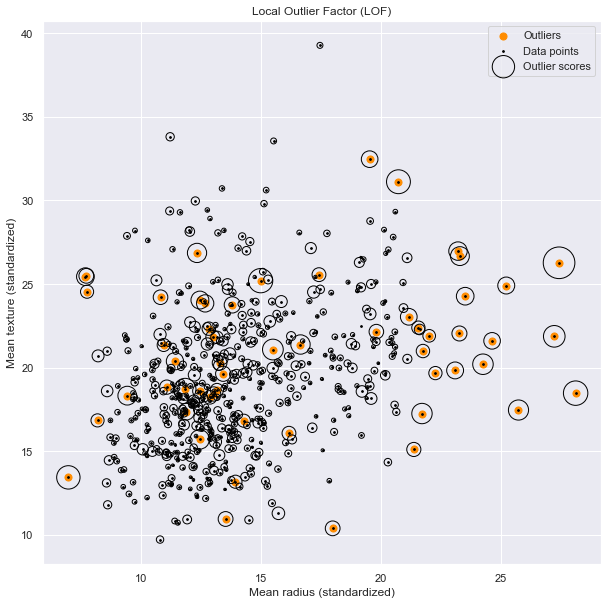

In [8]:
# Plot
plt.subplots(figsize=(10, 10))
plt.title('Local Outlier Factor (LOF)')
plt.scatter(X.iloc[index_of_outliers, 0], X.iloc[index_of_outliers, 1], color='darkorange', s=50, label='Outliers')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], color='black', s=3., label='Data points')
radius = (scores.max() - scores) / (scores.max() - scores.min())
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=1000 * radius, edgecolors='black',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlabel('Mean radius (standardized)')
plt.ylabel('Mean texture (standardized)')
plt.legend()
plt.show()

In [9]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
X_new = X.drop(index_of_outliers, axis=0)
y_new = y.drop(index_of_outliers, axis=0)

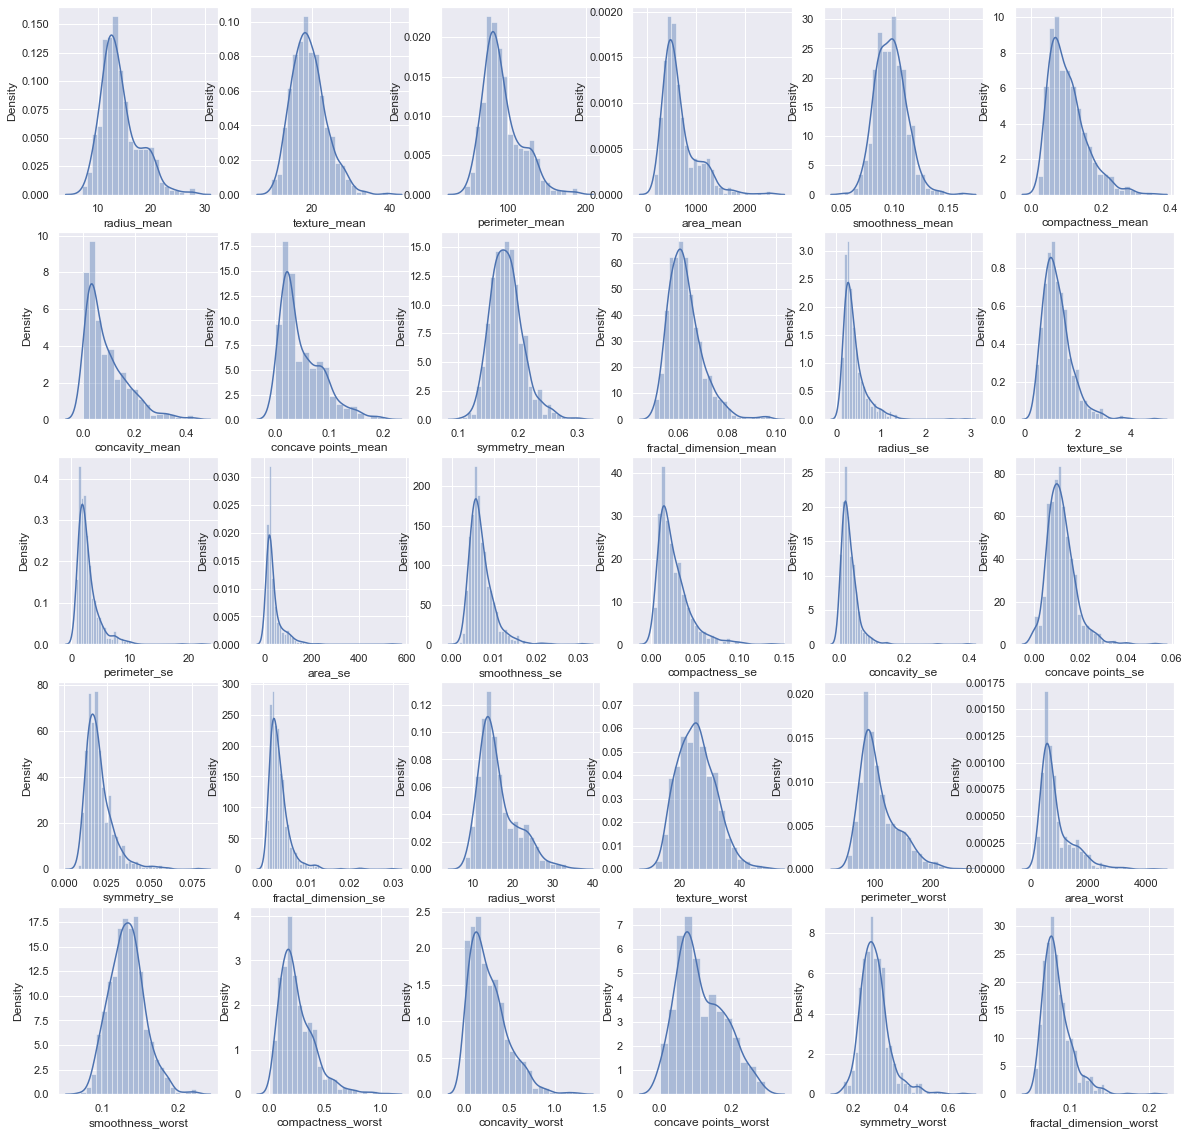

In [11]:
fig, ax = plt.subplots(5, 6, figsize=(20, 20))
for variable, subplot in zip(X.columns, ax.flatten()):
    sns.distplot(X[variable], ax=subplot)
plt.show()

In [12]:
def log_transformation(df, columns):
    '''
    Log transformation is a transformation that is used to make highly skewed distributions less skewed.
    :param df: dataframe
    :param columns: columns to be transformed
    :return: log transformation for each column
    '''
    for column in columns:
        # Add a new column to the dataframe
        df[column + '_log'] = np.log(df[column])
        # Drop the original column
        df.drop(column, axis=1, inplace=True)
    return df

In [13]:
column_to_log = ['texture_mean', 'smoothness_mean', 'smoothness_worst']
# Transform features to log scale
X_transformed = log_transformation(X_new, column_to_log)

In [14]:
from scipy.stats import shapiro


def test_cube_root_transform(df):
    for column in df.columns:
        data_cbrt = np.cbrt(np.abs(df[column]))
        if np.isnan(data_cbrt).any() or np.isinf(data_cbrt).any():
            print(column, 'has inf values, cannot be plotted')
        else:
            fig, axs = plt.subplots(nrows=1, ncols=2)
            axs[0].hist(df[column], edgecolor='black')
            axs[1].hist(data_cbrt, edgecolor='black')
            axs[0].set_title('Original Data')
            axs[1].set_title('Cube Root-Transformed Data')
            plt.title('Cube Root Transformation of ' + column)
            plt.show()
        stat, p = shapiro(data_cbrt)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably Gaussian')
        else:
            print('Probably not Gaussian')

In [15]:
def cube_root_transformation(df, columns):
    '''
    Cube root transformation is a transformation that is used to make highly skewed distributions less skewed.
    :param df: dataframe
    :param columns: columns to be transformed
    :return: cube root transformation for each column
    '''
    for column in columns:
        # Add a new column to the dataframe
        df[column + '_cbrt'] = np.cbrt(df[column])
        # Drop the original column
        df.drop(column, axis=1, inplace=True)
    return df

In [16]:
# Column to be transformed with cube root
column_to_cube_root = ['compactness_worst', 'concavity_worst', 'texture_worst', 'smoothness_se', 'symmetry_mean',
                       'compactness_mean']
X_transformed = cube_root_transformation(X_transformed, column_to_cube_root)

In [17]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


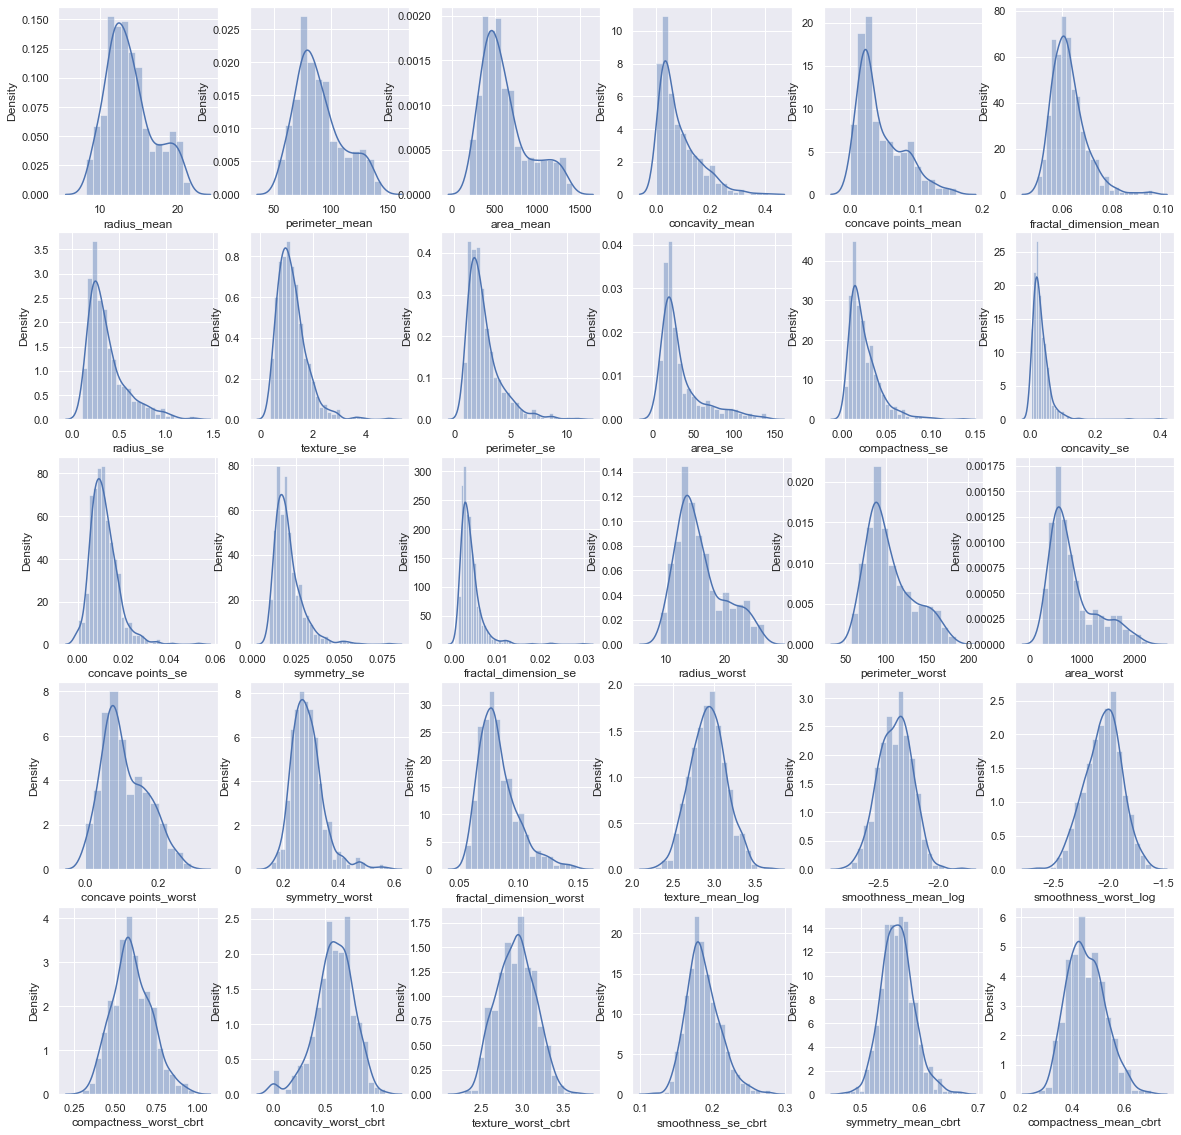

In [18]:
fig, ax = plt.subplots(5, 6, figsize=(20, 20))
for variable, subplot in zip(X_transformed.columns, ax.flatten()):
    sns.distplot(X_transformed[variable], ax=subplot)
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X_transformed)
X_transformed = pd.DataFrame(X_transformed)

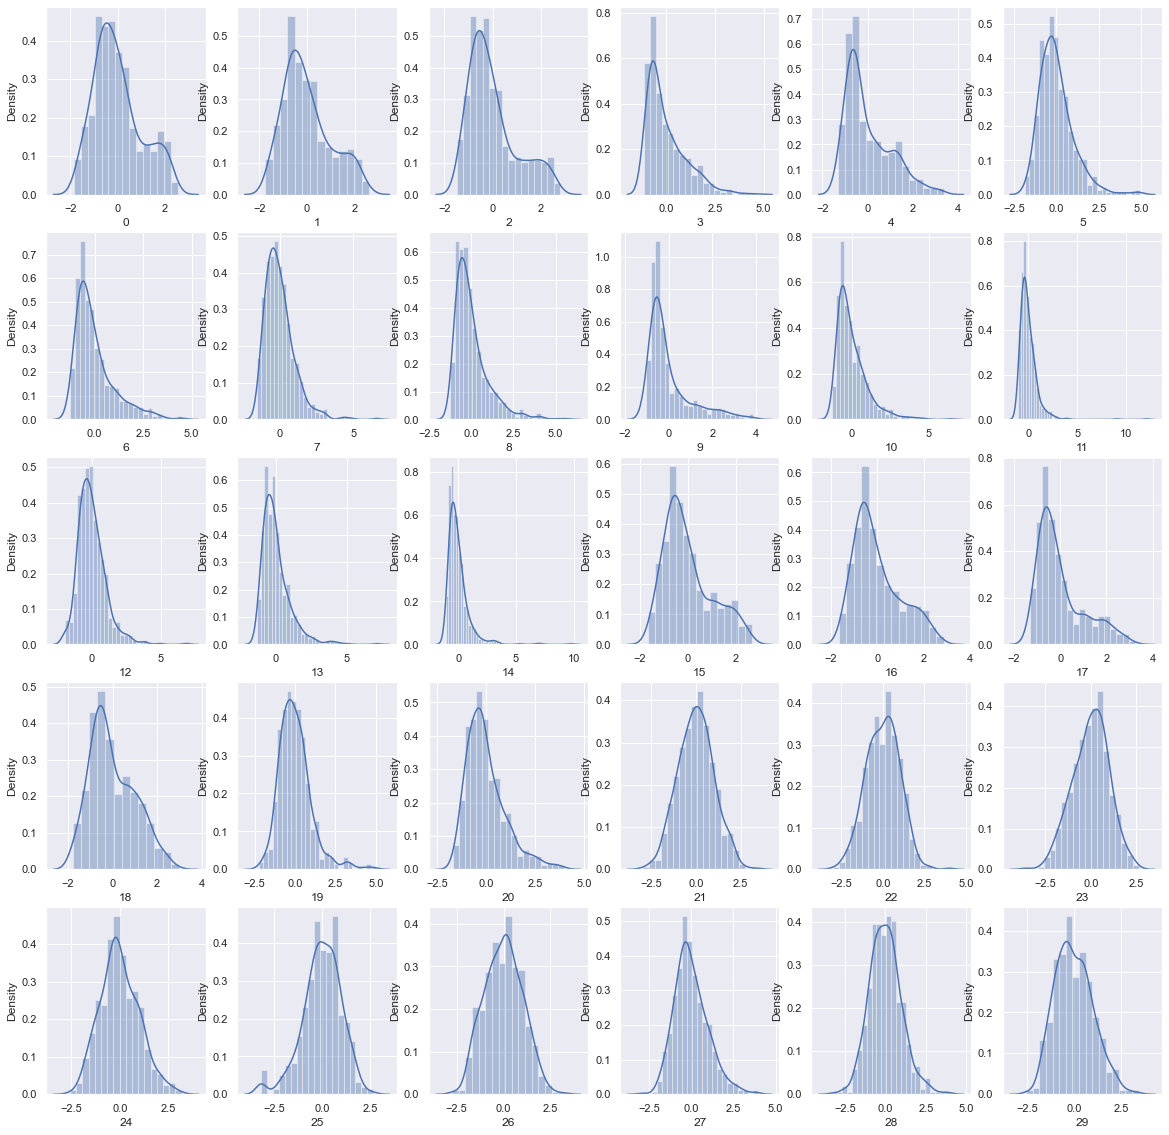

In [20]:
fig, ax = plt.subplots(5, 6, figsize=(20, 20))
for variable, subplot in zip(X_transformed.columns, ax.flatten()):
    sns.distplot(X_transformed[variable], ax=subplot)
plt.show()

In [21]:
# Split the data into train and test with 80% and 20% respectively, stratify the data
from sklearn.model_selection import train_test_split, KFold

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_new, test_size=0.2, stratify=y_new,
                                                    random_state=42)

In [22]:
# Hyper-parameters tuning
def grid_search():
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'penalty': ['l1', 'l2'],
                  'solver': ['liblinear', 'saga'],
                  'max_iter': [100, 1000, 2500, 5000]}
    grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
    grid.fit(X_train, y_train)
    return grid.best_params_

In [23]:
best_params = grid_search()

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, so

In [24]:
best_params

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [25]:
# Train the model with best hyper-parameters
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(**best_params)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [26]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))

Accuracy:  0.9805825242718447
Confusion Matrix:  [[69  0]
 [ 2 32]]
Classification Report:                precision    recall  f1-score   support

           0       0.97      1.00      0.99        69
           1       1.00      0.94      0.97        34

    accuracy                           0.98       103
   macro avg       0.99      0.97      0.98       103
weighted avg       0.98      0.98      0.98       103



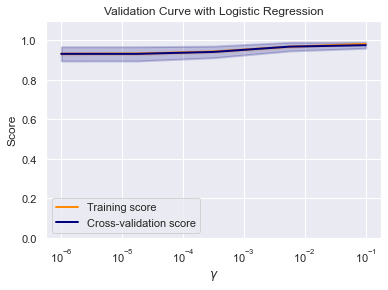

In [27]:
# Plot validation curve
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(model, X_train, y_train, param_name="C", param_range=param_range,
                                             cv=10, scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

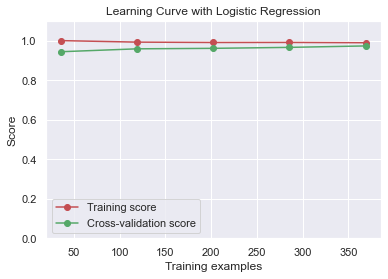

In [28]:
# Plot learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(), X_train, y_train, cv=10, scoring='accuracy', n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Learning Curve with Logistic Regression")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()

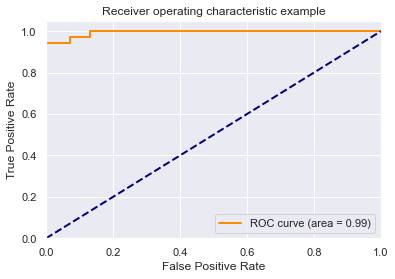

In [29]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc

y_score = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

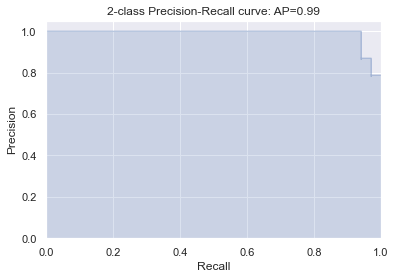

In [30]:
# Plot Precision-Recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
    average_precision))
plt.show()

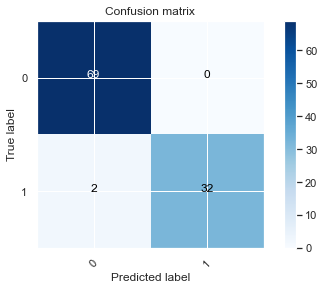

In [31]:
# Plot confusion matrix, annotated with the number of samples
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=45)
plt.yticks(tick_marks, ['0', '1'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.show()

In [32]:
# Get f1 score
from sklearn.metrics import f1_score

print('F1 score: ', f1_score(y_test, y_pred))

F1 score:  0.9696969696969697


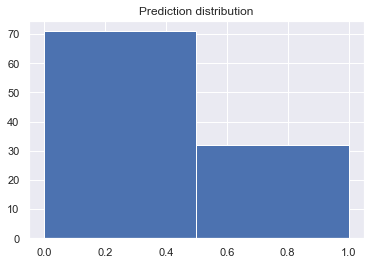

In [33]:
# Plot prediction distribution
plt.hist(y_pred, bins=2)
plt.title('Prediction distribution')
plt.show()

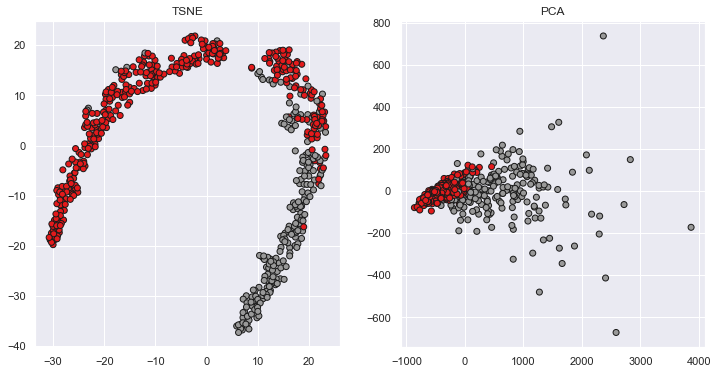

In [34]:
# Embedding visualization
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Create a TSNE model and fit it to the data
tsne = TSNE(n_components=2, random_state=0)
tsne2d = tsne.fit_transform(X)

# Create a PCA model and fit it to the data
pca = PCA(n_components=2, random_state=0)
pca2d = pca.fit_transform(X)

# Plot the data tsne and pca
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(tsne2d[:, 0], tsne2d[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
ax[0].set_title('TSNE')
ax[1].scatter(pca2d[:, 0], pca2d[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
ax[1].set_title('PCA')
plt.show()

In [35]:
# Fit model LogisticRegression with PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=20)),
                    ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.981
